In [1]:
from tensorflow.keras.models import load_model
import joblib

from PIL import Image
import numpy as np


In [2]:
# model = load_model('./models/model1.keras')
model = load_model('./models/model1.keras', compile=False) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
label_binarizer = joblib.load('./models/label_binarizer1.pkl') 

In [4]:

file_path = './data/test/test2.jpg'
og_image = Image.open(file_path)
image = og_image.convert('L') # convert to grayscale
image = image.resize((128, 128)) # resize
image = np.array(image) # convert to array
image = image / 255.0 # normalize

In [14]:
image_array = np.expand_dims(image, axis=0) 
print(image_array)

[[[0.12156863 0.10588235 0.09803922 ... 0.10588235 0.10196078 0.10980392]
  [0.10588235 0.28627451 0.36470588 ... 0.28627451 0.30196078 0.17647059]
  [0.10196078 0.37254902 0.48627451 ... 0.26666667 0.2745098  0.18431373]
  ...
  [0.11372549 0.12156863 0.11764706 ... 0.52156863 0.53333333 0.2627451 ]
  [0.11372549 0.10980392 0.09019608 ... 0.53333333 0.54509804 0.2745098 ]
  [0.11764706 0.11372549 0.10588235 ... 0.2627451  0.26666667 0.16470588]]]


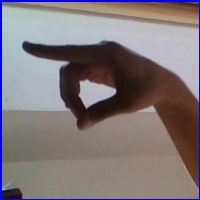

In [6]:
og_image

In [11]:

predictions = model.predict(image_array)
rounded = np.round(predictions)
print(rounded)

original_label = label_binarizer.inverse_transform(rounded)
print(original_label)
for l,p in zip(label_binarizer.classes_,predictions[0]):
    print(l,p)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['e']
0 9.024385e-06
1 8.864822e-06
2 3.2410355e-06
3 0.00058651716
4 0.005966344
5 4.62707e-07
6 3.2265067e-08
7 0.0073626544
8 2.4201124e-06
9 0.05259958
a 8.523276e-09
b 3.8520966e-06
c 0.010502694
d 1.5366959e-07
e 0.920367
f 7.256229e-06
g 6.7119734e-05
h 1.3736023e-07
i 1.3119106e-06
j 1.3787477e-06
k 6.9460116e-06
l 2.4252424e-05
m 6.486539e-06
n 7.1753307e-06
o 0.0004423961
p 4.3960642e-07
q 7.8727874e-07
r 1.3405206e-05
s 0.00038489664
t 1.353575e-05
u 7.021398e-06
v 9.199948e-05
w 1.602331e-06
x 7.4089194e-06
y 0.0007076616
z 0.00079386716
